In [1]:
import scipy.signal
import numpy as np
import scipy.io as scio
import matplotlib.pyplot as plt
import pandas as pd

# 函数

In [31]:
# 这个函数好像自带滤波的功能? 滤波前后结果差不多感觉

def scipy_spec(input_signal, fs = 1000, nperseg = None, noverlap = None, nfft = None, ylimt = None):

    f, t, nd = scipy.signal.spectrogram(input_signal, fs=fs, 
                     window=('tukey', 0.25), 
                     nperseg=nperseg, 
                     noverlap=noverlap, 
                     nfft=nfft, 
                     detrend='constant', 
                     return_onesided=True, 
                     scaling='spectrum', 
                     axis=- 1, 
                     mode='psd')
                    #  mode='magnitude'
                    #  mode='psd'
            
    # -------- plot time-frequency --------
    
    plt.figure(figsize=(10, 5))
    
    plt.subplot(2, 1, 1)
    plt.pcolormesh(t, f, nd)
    plt.title('STFT')
    plt.ylabel('frequency')
    plt.xlabel('time')
    
    if ylimt is not None:
        plt.ylim(ylimt[0], ylimt[1])
    
    # -------- plot time-amplitude --------
    
    plt.subplot(2, 1, 2)
    plt.plot(input_signal)
    
    plt.xlim(0,input_signal.shape[0])
    plt.show()
    
    return f, t, nd

def filters(cutoff_low, cutoff_high, data, fs = 1000):
    cutoff_low = cutoff_low/(fs/2)
    b,a = scipy.signal.butter(6,cutoff_low,'low',analog=False)
    data_f_low = scipy.signal.filtfilt(b,a,data)
    
    cutoff_high = cutoff_high/(fs/2)
    b,a = scipy.signal.butter(3,cutoff_high,'high',analog=False)
    data_f_low_high = scipy.signal.filtfilt(b,a,data_f_low)
    
    return data_f_low_high

# 数据集

## 数据集2 (csv)

In [32]:
data = pd.read_csv('../data/input_walk_170308_1307_20.csv',header=None).values
data.shape

(19995, 181)

input_signal.shape:  (19995,)


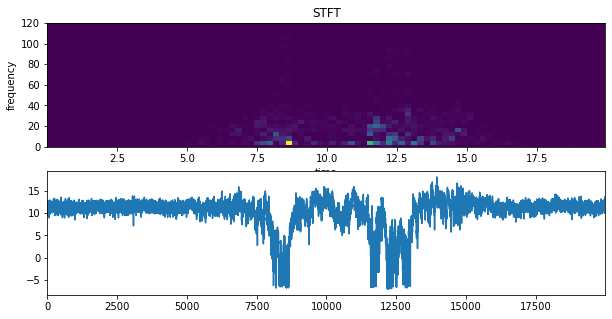

f  (129,) t (89,) nd (129, 89)


In [40]:
input_signal = data[:,1]
print('input_signal.shape: ', input_signal.shape)

f, t, nd = scipy_spec(input_signal, fs = 1000, nperseg = None, noverlap = None, nfft = None, ylimt = [0, 120])

print('f ',f.shape, 't', t.shape, 'nd', nd.shape)

### 滤波后

input_signal.shape:  (19995,)


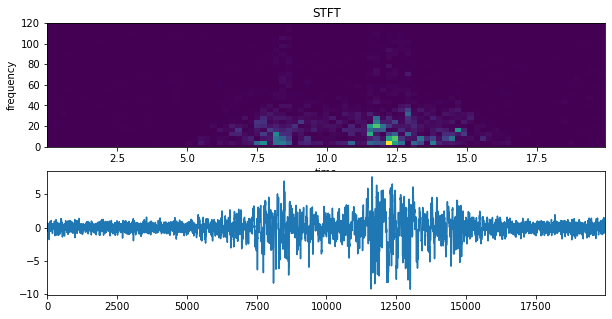

f  (129,) t (89,) nd (129, 89)


In [41]:
input_signal_f = filters(120,2,data[:,1])
print('input_signal.shape: ', input_signal_f.shape)

f, t, nd = scipy_spec(input_signal_f, fs = 1000, nperseg = None, noverlap = None, nfft = None, ylimt = [0, 120])

print('f ',f.shape, 't', t.shape, 'nd', nd.shape)

## 数据集3 (dat)

In [42]:
from CSI_reader.wifilib import *

In [43]:
bf = read_bf_file('../data/userA-1-1-1-1-r1.dat')

In [44]:
csi2_list = list(map(get_scale_csi, bf))
csi2_np = np.array(csi2_list)

csi2_amp = (np.abs(csi2_np))
csi2_amp.shape

(1479, 1, 3, 30)

input_signal.shape:  (1479,)


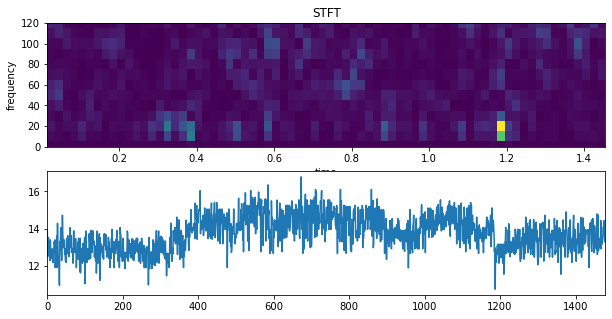

f  (51,) t (72,) nd (51, 72)


In [45]:
input_signal = csi2_amp[:,0,2,10]
print('input_signal.shape: ', input_signal.shape)

f, t, nd = scipy_spec(input_signal, fs = 1000, nperseg = 50, noverlap = 30, nfft = 100, ylimt = [0, 120])

print('f ',f.shape, 't', t.shape, 'nd', nd.shape)

### 滤波后

input_signal.shape:  (1479,)


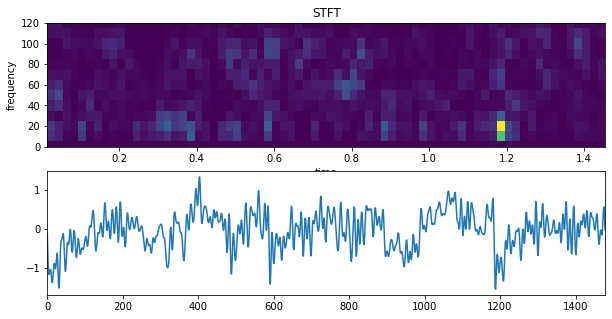

f  (51,) t (72,) nd (51, 72)


In [38]:
input_signal_f = filters(120,2,csi2_amp[:,0,2,10])
print('input_signal.shape: ', input_signal_f.shape)

f, t, nd = scipy_spec(input_signal_f, fs = 1000, nperseg = 50, noverlap = 30, nfft = 100, ylimt = [0, 120])

print('f ',f.shape, 't', t.shape, 'nd', nd.shape)

## 老师那个数据集 (mat)

In [46]:
csi = scio.loadmat(r'../data/test_data_split_amp.mat')
csi['test_data'].shape

(278, 52, 192)

input_signal.shape:  (192,)


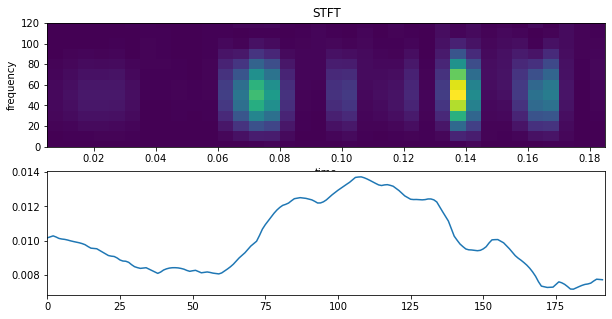

f  (51,) t (36,) nd (51, 36)


In [51]:
input_signal = csi['test_data'][1,0,:]
print('input_signal.shape: ', input_signal.shape)

f, t, nd = scipy_spec(input_signal, fs = 1000, nperseg = 15, noverlap = 10, nfft = 100, ylimt = [0, 120])

print('f ',f.shape, 't', t.shape, 'nd', nd.shape)